## Development of LP-WAN based AI enabled health monitoring system



## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [52]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data 

In [53]:
df = pd.read_csv("csv/qt_dataset.csv")
df.shape # (rows, columns)

(10000, 5)

In [54]:
df.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98,65,95,Negative
1,1,96,92,95,Negative
2,2,95,92,99,Negative
3,3,97,56,96,Negative
4,4,88,94,98,Positive


In [55]:
df.tail()

,ID,Oxygen,PulseRate,Temperature,Result
9995,9995,95,124,97,Negative
9996,9996,88,70,100,Positive
9997,9997,99,56,105,Negative
9998,9998,92,49,98,Positive
9999,9999,85,52,99,Positive


In [56]:
# Are there any missing values?
df.isna().sum()

ID             0
Oxygen         0
PulseRate      0
Temperature    0
Result         0
dtype: int64

In [57]:
df['Result'] = df['Result'].replace({'Negative': 'Not Sick', 'Positive': 'Sick'})

In [58]:
# Let's find out how many of each class there 
df["Result"].value_counts()

Result
Not Sick    5010
Sick        4990
Name: count, dtype: int64

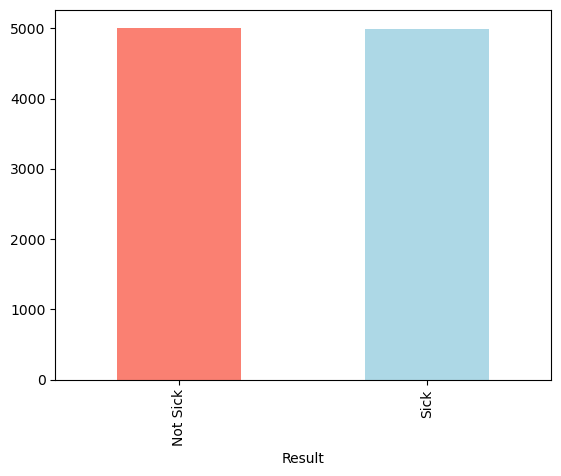

In [59]:
df["Result"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10000 non-null  int64 
 1   Oxygen       10000 non-null  int64 
 2   PulseRate    10000 non-null  int64 
 3   Temperature  10000 non-null  int64 
 4   Result       10000 non-null  object
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [61]:
# Removing ID column
df.drop(columns=['ID'], inplace=True)

In [62]:
df.head()

,Oxygen,PulseRate,Temperature,Result
0,98,65,95,Not Sick
1,96,92,95,Not Sick
2,95,92,99,Not Sick
3,97,56,96,Not Sick
4,88,94,98,Sick


In [63]:
df.tail()

,Oxygen,PulseRate,Temperature,Result
9995,95,124,97,Not Sick
9996,88,70,100,Sick
9997,99,56,105,Not Sick
9998,92,49,98,Sick
9999,85,52,99,Sick


In [64]:
df.describe()

,Oxygen,PulseRate,Temperature
count,10000.000000,10000.000000,10000.000000
mean,92.548900,84.976600,100.000700
std,4.611197,26.305841,3.185045
min,85.000000,40.000000,95.000000
25%,88.000000,63.000000,97.000000
50%,93.000000,85.000000,100.000000
75%,97.000000,108.000000,103.000000
max,100.000000,130.000000,105.000000


## Result w.r.t Oxygen

In [65]:
df.Oxygen.value_counts()

Oxygen
87     666
97     660
92     659
98     649
85     641
96     637
94     631
93     628
95     626
100    623
91     619
88     610
99     610
86     586
90     582
89     573
Name: count, dtype: int64

In [66]:
# Compare Result column with oxygen column 
pd.crosstab(df.Result, df.Oxygen)

Oxygen,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
Result,,,,,,,,,,,,,,,,
Not Sick,0,0,0,0,0,222,206,257,343,351,535,554,660,649,610,623
Sick,641,586,666,610,573,360,413,402,285,280,91,83,0,0,0,0


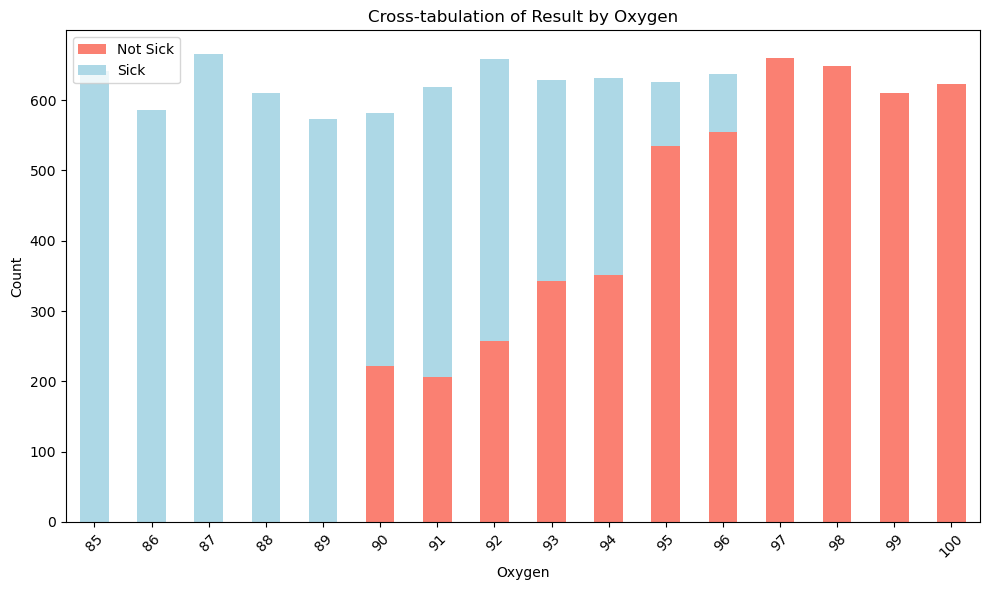

In [67]:
# Create a cross-tabulation of 'Result' by 'Oxygen'
cross_tab = pd.crosstab(df['Oxygen'], df['Result'])

# Plot the cross-tabulation as a stacked bar plot
cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6), color=["salmon", "lightblue"])

# Set title and labels
plt.title("Cross-tabulation of Result by Oxygen")
plt.xlabel("Oxygen")
plt.ylabel("Count")
plt.legend(["Not Sick", "Sick"], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
df.head()

,Oxygen,PulseRate,Temperature,Result
0,98,65,95,Not Sick
1,96,92,95,Not Sick
2,95,92,99,Not Sick
3,97,56,96,Not Sick
4,88,94,98,Sick


In [70]:
# Converting string into floats through mapping
mapping = {'Not Sick': 0, 'Sick': 1}
df['Result'] = df['Result'].replace(mapping)

# Make a correlation matrix
df.corr()

,Oxygen,PulseRate,Temperature,Result
Oxygen,1.000000,-0.005724,-0.015681,-0.777019
PulseRate,-0.005724,1.000000,0.009602,0.050590
Temperature,-0.015681,0.009602,1.000000,0.262522
Result,-0.777019,0.050590,0.262522,1.000000


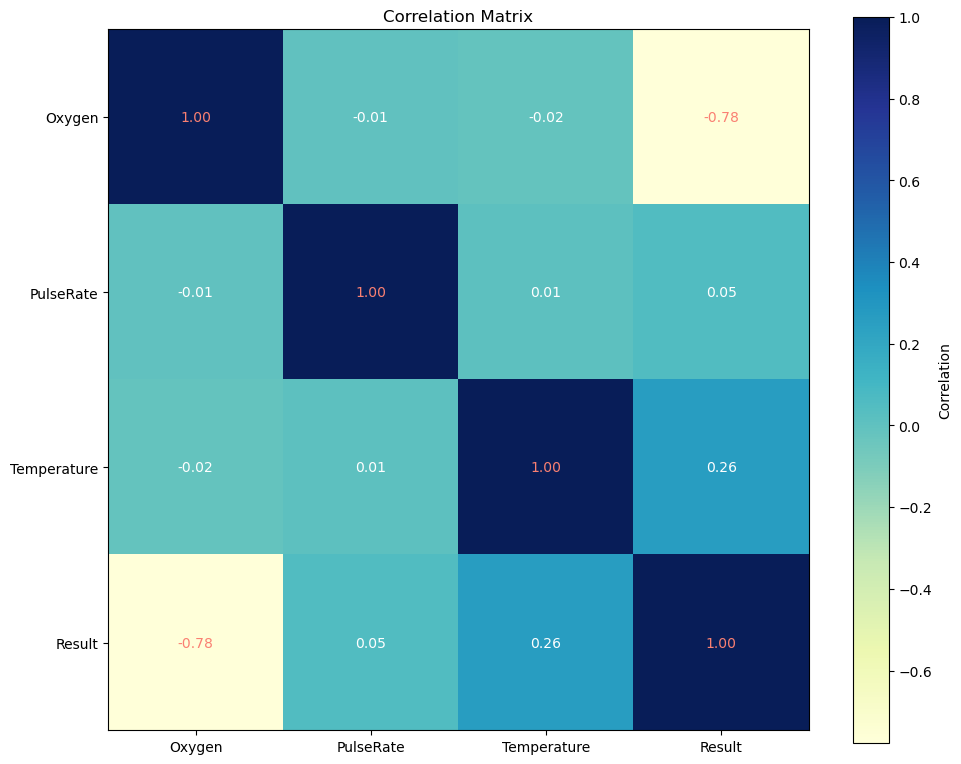

In [110]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='YlGnBu', interpolation='nearest')

# Add color bar
plt.colorbar(label='Correlation')

# Set ticks and labels
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.columns)

# Add annotations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, '{:.2f}'.format(corr_matrix.iloc[i, j]),
                 ha='center', va='center',
                 color='salmon' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'white')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Modelling 

In [111]:
df.head()

,Oxygen,PulseRate,Temperature,Result
0,98,65,95,0
1,96,92,95,0
2,95,92,99,0
3,97,56,96,0
4,88,94,98,1


In [112]:
# Split the data into X and y 
X = df.drop("Result", axis=1)
y = df["Result"]

In [113]:
X

,Oxygen,PulseRate,Temperature
0,98,65,95
1,96,92,95
2,95,92,99
3,97,56,96
4,88,94,98
...,...,...,...
9995,95,124,97
9996,88,70,100
9997,99,56,105
9998,92,49,98


In [114]:
y

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    1
Name: Result, Length: 10000, dtype: int64

In [115]:
# Split data into train and tests sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [116]:
X_train

,Oxygen,PulseRate,Temperature
9254,88,44,102
1561,92,50,101
1670,88,113,105
6087,98,129,102
6669,97,127,97
...,...,...,...
5734,87,53,99
5191,97,118,105
5390,92,102,99
860,100,49,96


In [117]:
y_train

9254    1
1561    1
1670    1
6087    0
6669    0
       ..
5734    1
5191    0
5390    0
860     0
7270    0
Name: Result, Length: 8000, dtype: int64

### Now we've got our data into training and test sets, it's time to build a machine learning model

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

### We're going to try 3 different machine learning models:

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [118]:
# Put models in a dictionary 
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [119]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test) 
model_scores

{'Logistic Regression': 0.9235, 'KNN': 0.9855, 'Random Forest': 1.0}

### Model Comparision    

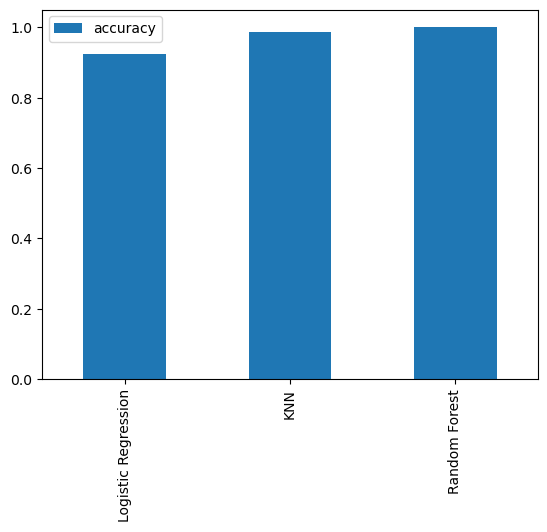

In [122]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we got a baseline model.. and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

### Hyperparameter tuning (By Hand)


In [123]:
# Let's tune K-Neighbours Classifier

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbors = range(1, 21)

# Start KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list 
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [124]:
train_scores

[1.0,
 0.992375,
 0.995875,
 0.992875,
 0.993875,
 0.9915,
 0.992,
 0.989375,
 0.990125,
 0.988375,
 0.989375,
 0.98825,
 0.9905,
 0.987875,
 0.989375,
 0.98775,
 0.989125,
 0.987875,
 0.990375,
 0.988125]

In [125]:
test_scores

[0.9855,
 0.9845,
 0.9875,
 0.986,
 0.9855,
 0.9845,
 0.983,
 0.982,
 0.9825,
 0.9825,
 0.987,
 0.984,
 0.988,
 0.987,
 0.9855,
 0.984,
 0.9855,
 0.985,
 0.9865,
 0.984]

Maximum KNN score on the test data: 98.80%


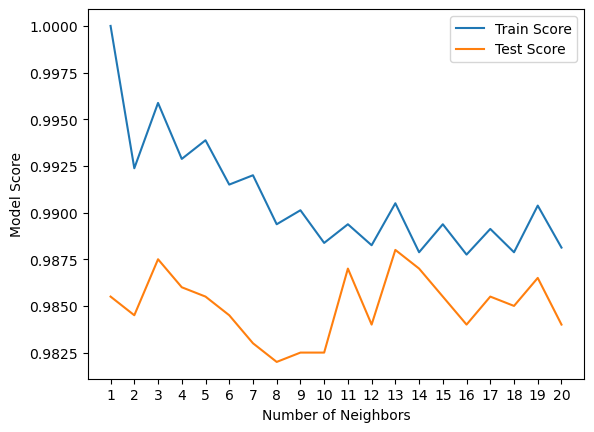

In [126]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning with RandomizedSearchCV 

we're going to tune:

* LogisticRegression()
* RandomForestClassifier()
  
...using RandomizedSearchCV

In [127]:
# Create a hyperparameter Grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 100, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2 , 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV..

In [128]:
## Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [129]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [130]:
rs_log_reg.score(X_test, y_test)

0.9235

### Now it's turn to tune RandomForestClassifier()

In [131]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameters search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=100,
                          verbose=True)

# Fit random hyperparameters search for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [132]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_depth': None}

In [133]:
rs_rf.score(X_test, y_test)

1.0

### Hyperparameters of LogisticRegression (by GridSearchCV)

In [134]:
# Different hyperparameters for our LogisticsRegression Model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameters search for LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [135]:
gs_log_reg.best_params_

{'C': 417.53189365604004, 'solver': 'liblinear'}

In [136]:
gs_log_reg.score(X_test, y_test)

0.9235

### Evaluating our tuned Machine Learning Classifier, beyond Accuracy

* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

To make comparisions and evaluate our trained model, first we need to make predictions

In [138]:
# make predictions with a tuned model
y_preds = rs_rf.predict(X_test)

In [139]:
y_preds

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [140]:
y_test

6252    1
4684    0
1731    0
4742    1
4521    0
       ..
6412    1
8285    0
7853    0
1095    0
6929    1
Name: Result, Length: 2000, dtype: int64

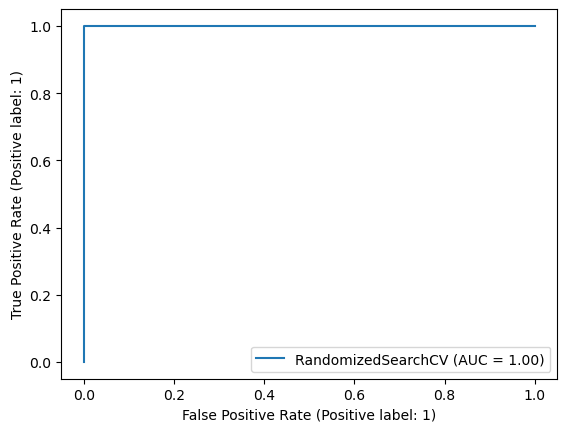

In [141]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test);

In [142]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[1005    0]
 [   0  995]]


In [161]:
sns.set(font_scale=1.5)

def plot_conf_mat (y_test, y_preds):
    """
    Plots a nice confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
# plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [146]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1005
           1       1.00      1.00      1.00       995

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [147]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_depth': None}

In [151]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators= 60,
                            min_samples_split= 12,
                            min_samples_leaf= 7,
                            max_depth= None)

In [152]:
# Cross-Validated Accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.9999

In [153]:
# Cross-Validated Precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

1.0

In [154]:
# Cross-Validated Recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

1.0

In [155]:
# Cross-Validated F1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9996989463120922

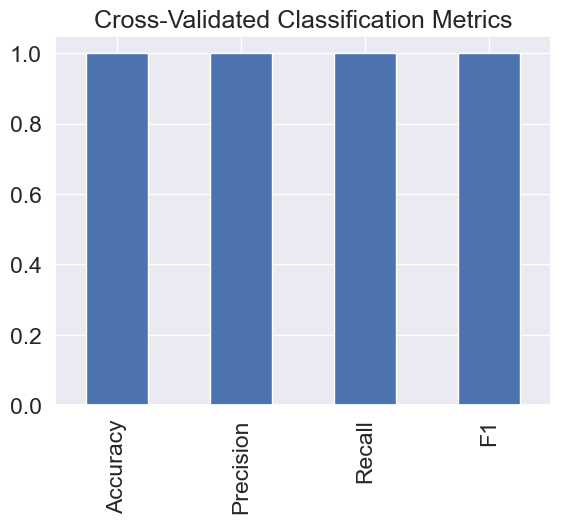

In [156]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                     legend=False);